In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
import os


dir_containing_file = r'Z:\Public\Arijit Mandal\08 Articles\Article 2\Experimantal Data\PPW and BP\Single subject\Test 1'
# 👇️ change to directory containing file
os.chdir(dir_containing_file)
print(os.getcwd())

Z:\Public\Arijit Mandal\08 Articles\Article 2\Experimantal Data\PPW and BP\Single subject\Test 1


In [14]:
os.listdir()

['137.txt',
 '182.txt',
 '2023_5_26_test 1.png',
 '2023_5_26_test 1.txt',
 '233.txt',
 '276.txt',
 '325',
 '325.txt',
 '370.txt',
 '90-2.txt',
 '90.txt',
 'Excel analysis test 1.xlsx',
 'full data.txt',
 '~$Excel analysis test 1.xlsx']

In [15]:
Data=np.genfromtxt("2023_5_26_test 1.txt",delimiter=',',skip_header=10000, skip_footer=1000)

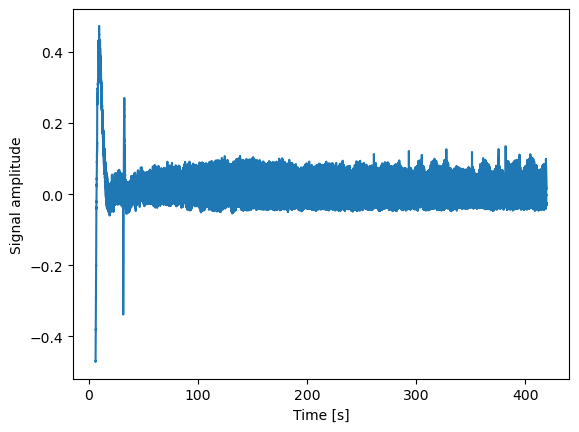

In [16]:
t = Data[:,0]
x = Data[:,1]

fig, ax = plt.subplots()
ax.plot(t, x)
ax.set_xlabel('Time [s]')
ax.set_ylabel('Signal amplitude');

In [17]:
# f = 10  # Frequency, in cycles per second, or Hertz
# fs = 100  # Sampling rate, or number of measurements per second

# t = np.linspace(0, 2, 2 * fs, endpoint=False)
# x = np.sin(f * 2 * np.pi * t)
# fig, ax = plt.subplots()
# ax.plot(t, x)
# ax.set_xlabel('Time [s]')
# ax.set_ylabel('Signal amplitude');

In [18]:
# y=0
# for z in t:
#  if(z>=0 and z<1):
#   y +=1
# print(y)
# f_s = y # Sampling rate, or number of measurements per second


In [19]:
y=t[2]-t[1]
f_s=1/y
print(f_s)

1612.6691286749685


(-5.0, 1000.0)

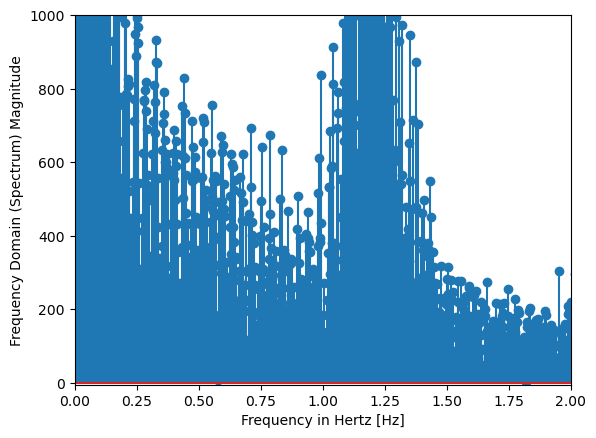

In [20]:
from scipy import fftpack

X = fftpack.fft(x)
freqs = fftpack.fftfreq(len(x)) * f_s

fig, ax = plt.subplots()

ax.stem(freqs, np.abs(X))
ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
#ax.set_xlim(-f_s / 2, f_s / 2)
ax.set_xlim(0,2)
ax.set_ylim(-5, 1000)
#ax.axis([0.5, 1.5, 15, 20]) 

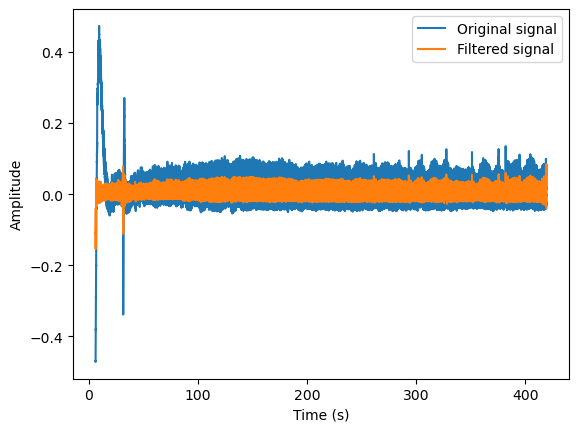

In [21]:
# Define the frequency range of interest
f_min = 0.5 # Hz
f_max = 10 # Hz

# Create a filter that attenuates the frequencies outside the range of interest
filter = np.logical_and(freqs >= f_min, freqs <= f_max).astype(int)

# Apply the filter to the frequency-domain representation of the signal
X_filtered = X * filter

# Compute the inverse FFT of the filtered signal
x_filtered = np.fft.ifft(X_filtered).real

# Plot the original and filtered signals
plt.figure()
plt.plot(t, x, label='Original signal')
plt.plot(t, x_filtered, label='Filtered signal')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()


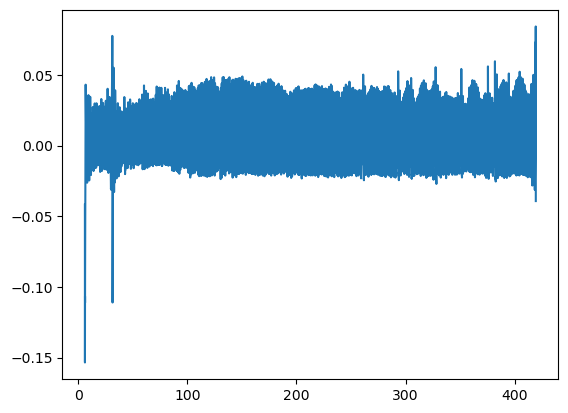

In [22]:
plt.plot(t, x_filtered, label='Filtered signal')

In [23]:
# # Define the range of frequency values of interest
# min_freq = 0.5
# max_freq = 2.0

# # Find the indices of the frequency values within the range
# freq_indices = np.where((freqs >= min_freq) & (freqs <= max_freq))[0]

# # Find the magnitude of the signal within the frequency range
# mY_range = np.abs(X[freq_indices])

# # Find the location and value of the maximum peak within the range
# peak_loc = freq_indices[np.argmax(mY_range)]
# peak_val = np.max(mY_range)

# # Get the actual frequency value corresponding to the peak location
# freq_peak = freqs[peak_loc]
# freqY=freq_peak
# # Print the results
# print("Peak frequency: {:.2f} Hz".format(freq_peak))
# print("Peak magnitude: {:.2f}".format(peak_val))

In [24]:
# Define the range of frequency values of interest
min_freq = 0.5
max_freq = 2.0

# Find the indices of the frequency values within the range
freq_indices = np.where((freqs >= min_freq) & (freqs <= max_freq))[0]

# Find the magnitude of the signal within the frequency range
mY_range = np.abs(X_filtered[freq_indices])

# Find the location and value of the maximum peak within the range
peak_loc = freq_indices[np.argmax(mY_range)]
peak_val = np.max(mY_range)

# Get the actual frequency value corresponding to the peak location
freq_peak = freqs[peak_loc]
freqY=freq_peak
# Print the results
print("Peak frequency: {:.2f} Hz".format(freq_peak))
print("Peak magnitude: {:.2f}".format(peak_val))

Peak frequency: 1.19 Hz
Peak magnitude: 4049.52


In [25]:
# mY = np.abs(X) # Find magnitude
# peakY = np.max(mY) # Find max peak
# locY = np.argmax(mY) # Find its location
# freqY = freqs[locY] # Get the actual frequency value
# print(freqY)

In [26]:
BPM= 60*freqY
print("Beats per minute =", BPM)

Beats per minute = 71.44560489023387
